In [4]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from haar import *

%matplotlib inline

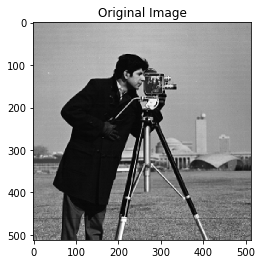

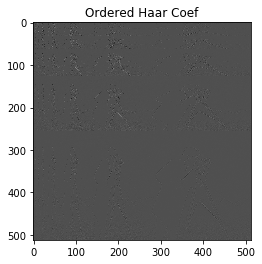

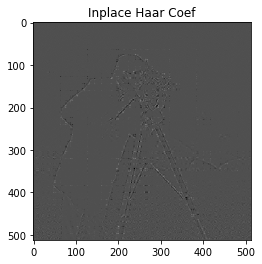

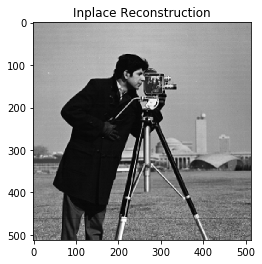

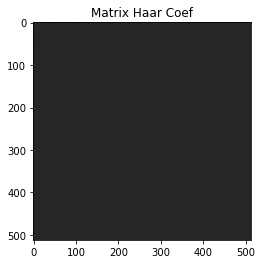

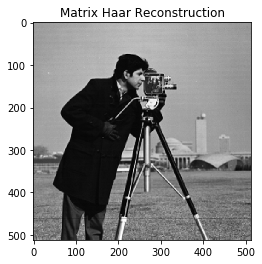

In [2]:
cam = imageio.imread("imageio:camera.png")
imageio.imsave("cam.png", cam)
cam = imageio.imread("cam.png").astype(float)
plt.imshow(cam, cmap='gray')
plt.title("Original Image")
plt.show()

xform_cam = ordered_fast_2d_haar_transform(cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Ordered Haar Coef")
plt.show()
# imageio.imsave("ordered_xform.png", xform_cam)

# xform_cam = ordered_inverse_fast_2d_haar_transform(cam).astype(np.uint8)
# imageio.imsave("ordered_inverse_xform.png", xform_cam)

xform_cam = inplace_fast_2d_haar_transform(cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Inplace Haar Coef")
plt.show()
# imageio.imsave("inplace_xform.png", xform_cam)

xform_cam = inplace_inverse_fast_2d_haar_transform(xform_cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Inplace Reconstruction")
plt.show()
# imageio.imsave("inplace_inverse_cam_xform.png", xform_cam)

xform_cam = matrix_2d_haar_transform(cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Matrix Haar Coef")
plt.show()
# imageio.imsave("matrix_xform.png", xform_cam)

xform_cam = matrix_inverse_2d_haar_transform(xform_cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Matrix Haar Reconstruction")
plt.show()
# imageio.imsave("matrix_inverse_xform.png", xform_cam)

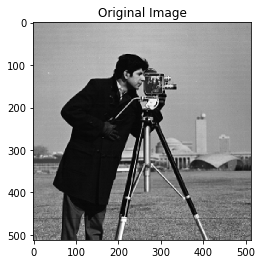

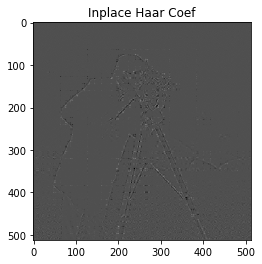

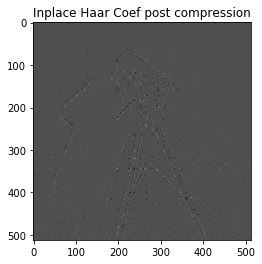

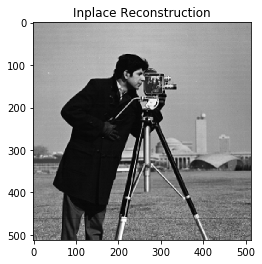

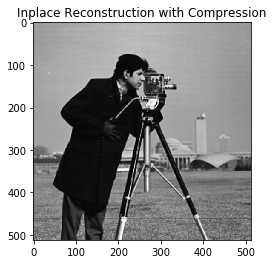

Threshold value of 0.25
Original has 35039 zero valued Haar coef
Compressed has 92746 zero valued Haar coef
Compression ratio of 2.646936271012301


In [3]:
cam = imageio.imread("cam.png").astype(float)
plt.imshow(cam, cmap='gray')
plt.title("Original Image")
plt.show()

xform_cam = inplace_fast_2d_haar_transform(cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Inplace Haar Coef")
plt.show()
uncompressed_zero_elements = np.count_nonzero(xform_cam == 0)

compressed_xform_cam = inplace_fast_2d_haar_transform(cam)
thresh = .25
thresh_indices = abs(compressed_xform_cam) < abs(thresh)
compressed_xform_cam[thresh_indices] = 0
plt.imshow(compressed_xform_cam, cmap='gray')
plt.title("Inplace Haar Coef post compression")
plt.show()
compressed_zero_elements = np.count_nonzero(compressed_xform_cam == 0)

xform_cam = inplace_inverse_fast_2d_haar_transform(xform_cam)
plt.imshow(xform_cam, cmap='gray')
plt.title("Inplace Reconstruction")
plt.show()

compressed_cam = inplace_inverse_fast_2d_haar_transform(compressed_xform_cam)
plt.imshow(compressed_cam, cmap='gray')
plt.title("Inplace Reconstruction with Compression")
plt.show()

print("Threshold value of {}".format(thresh))
print("Original has {} zero valued Haar coef".format(uncompressed_zero_elements))
print("Compressed has {} zero valued Haar coef".format(compressed_zero_elements))
print("Compression ratio of {}".format(compressed_zero_elements/uncompressed_zero_elements))

In [1]:
from timing_experiments import *

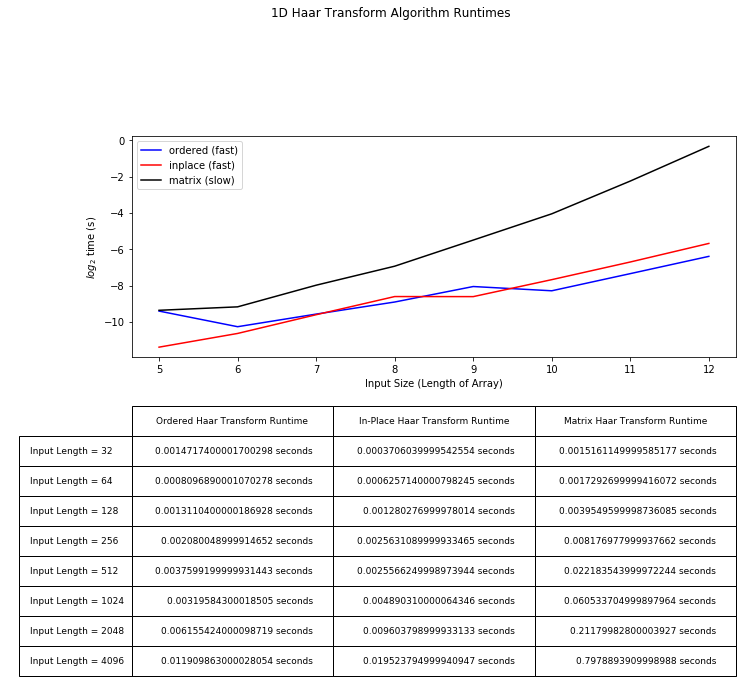

In [2]:
one_dim_forward_benchmark()

In [ ]:
def matrix_1d_haar_transform(signal):
    s = zero_pad(signal)
    N = int(log(len(s), 2))

    return haar_transform_matrix(N) @ s

In [ ]:
signal = [1,2,3,4]
matrix_1d_haar_transform(signal)